# Question 5

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras.datasets import fashion_mnist

### 5.1 We start by loading the dataset and preparing the data

In [3]:
mnist = tf.keras.datasets.mnist

Train / Test split

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Resampling data

In [5]:
x_train_s, x_test_s = x_train.reshape(60000, 784) / 255, x_test.reshape(10000, 784) / 255

In [6]:
x_train_s.shape

(60000, 784)

In [7]:
x_train_s[0].shape

(784,)

In [8]:
x_test.shape

(10000, 28, 28)

### 5.2 Now we create an Autoencoder with a structure [400, 200, 100, 50, N, 50, 100, 200, 400]

N will be looped through [50, 25, 10, 5]

We will do this by creating a looping function that outputs the Autoencoder model.

For this reconstruction model, we wil use:

- Sigmoid activation in the output layer (last layer in decoder)
- Loss function: Mean Squared Error
- Metric: Loss of the validation set

We chose to use MSE + val_loss for it responded better to the model in comparison to Binary Crossentropy + Accuracy.

In [9]:
# Defining the autoencoder function
def build_autoencoder(N):

    encoder = Sequential()
    encoder.add(Dense(400,  activation='relu', input_shape=(784,)))
    encoder.add(Dense(200,  activation='relu'))
    encoder.add(Dense(100,  activation='relu'))
    encoder.add(Dense(50,   activation='relu'))
    encoder.add(Dense(N,   activation='relu')) # Bottleneck

    decoder = Sequential()
    decoder.add(Dense(50,  input_shape=[N], activation='relu'))
    decoder.add(Dense(100,  activation='relu'))
    decoder.add(Dense(200,  activation='relu'))
    decoder.add(Dense(400,  activation='relu'))
    decoder.add(Dense(784,  activation='sigmoid'))
    
    autoencoder = Sequential([encoder, decoder])
    
    autoencoder.compile(loss='MSE', optimizer = Adam())
    
    return autoencoder

In [10]:
# Creating a results DataFrame to store the validation loss on the test set 
results = pd.DataFrame(index=['val_accuracy'])

Now we will loop through the desired values of N and store the accuracy of each in our DataFrame

In [11]:
# We use x_train_s as both input and output data, since the autoencoder is recreating the initial images
for n in [50, 25, 10, 5]:
    trained_model = build_autoencoder(n).fit(x_train_s, x_train_s, batch_size=1024, 
                                epochs=10, verbose=1, 
                                validation_data=(x_test_s, x_test_s))
    results[n] = trained_model.history['val_loss'][-1]

Epoch 1/10
59/59 [==============================] - 2s 30ms/step - loss: 0.0909 - val_loss: 0.0683
Epoch 2/10
59/59 [==============================] - 2s 27ms/step - loss: 0.0623 - val_loss: 0.0557
Epoch 3/10
59/59 [==============================] - 2s 29ms/step - loss: 0.0476 - val_loss: 0.0406
Epoch 4/10
59/59 [==============================] - 2s 28ms/step - loss: 0.0374 - val_loss: 0.0339
Epoch 5/10
59/59 [==============================] - 2s 29ms/step - loss: 0.0320 - val_loss: 0.0298
Epoch 6/10
59/59 [==============================] - 2s 30ms/step - loss: 0.0287 - val_loss: 0.0278
Epoch 7/10
59/59 [==============================] - 2s 28ms/step - loss: 0.0264 - val_loss: 0.0252
Epoch 8/10
59/59 [==============================] - 2s 30ms/step - loss: 0.0247 - val_loss: 0.0237
Epoch 9/10
59/59 [==============================] - 2s 32ms/step - loss: 0.0234 - val_loss: 0.0231
Epoch 10/10
59/59 [==============================] - 2s 29ms/step - loss: 0.0223 - val_loss: 0.0214
Epoch 1/1

In [12]:
results

,50,25,10,5
val_accuracy,0.021365,0.02344,0.033793,0.03868


### Results interpretation
##### Observing the results in the DataFrame, as we decrease the number of nodes in the Bottleneck layer the loss on the validation data goes up. This makes sense since the more we reduce the dimension of the initial images, the more we loose information and, therefore, performance.

### 5.3 - Generating a non-image

Now we will pass an image that is completely different from the ones in the MNIST dataset. We will try to reconstruct this image using our build_autoencoder function

In [13]:
# We build and fit our model using N = 50, for maximum performance
trained_model = build_autoencoder(50).fit(x_train_s, x_train_s, batch_size=1024, 
                                epochs=10, verbose=1, 
                                validation_data=(x_test_s, x_test_s))

Epoch 1/10
59/59 [==============================] - 3s 36ms/step - loss: 0.0942 - val_loss: 0.0687
Epoch 2/10
59/59 [==============================] - 2s 30ms/step - loss: 0.0637 - val_loss: 0.0586
Epoch 3/10
59/59 [==============================] - 2s 31ms/step - loss: 0.0519 - val_loss: 0.0449
Epoch 4/10
59/59 [==============================] - 2s 31ms/step - loss: 0.0395 - val_loss: 0.0355
Epoch 5/10
59/59 [==============================] - 2s 30ms/step - loss: 0.0336 - val_loss: 0.0310
Epoch 6/10
59/59 [==============================] - 2s 34ms/step - loss: 0.0299 - val_loss: 0.0284
Epoch 7/10
59/59 [==============================] - 2s 32ms/step - loss: 0.0273 - val_loss: 0.0259
Epoch 8/10
59/59 [==============================] - 2s 32ms/step - loss: 0.0254 - val_loss: 0.0245
Epoch 9/10
59/59 [==============================] - 2s 31ms/step - loss: 0.0237 - val_loss: 0.0224
Epoch 10/10
59/59 [==============================] - 2s 32ms/step - loss: 0.0220 - val_loss: 0.0210


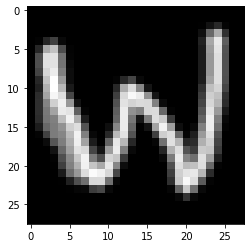

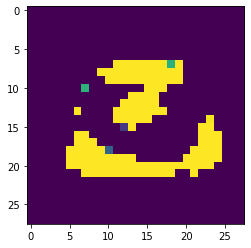

[2545.8208]


In [22]:
# We pass in an image of the letter W in the correct format for this exercise
from tensorflow.keras.preprocessing import image

img = image.load_img("img_Q52.png", target_size=(28, 28), 
                     color_mode = "grayscale")
plt.imshow(img, cmap='gray')
plt.show()

# Now we use our build_autoencoder function to try and predict the passed image
input_img = image.img_to_array(img)
inputs = input_img.reshape(1,784)
target_data = trained_model.model.predict(inputs)
plt.imshow(target_data.reshape(28,28))
plt.show()

dist = np.linalg.norm(inputs - target_data, axis=-1)
print(dist)

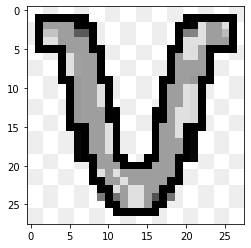

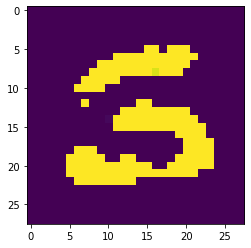

[5737.8027]


In [21]:
# We pass in an image of the letter V in the correct format for this exercise
from tensorflow.keras.preprocessing import image

img = image.load_img("img_Q5.png", target_size=(28, 28), 
                     color_mode = "grayscale")
plt.imshow(img, cmap='gray')
plt.show()

# Now we use our build_autoencoder function to try and predict the passed image
input_img = image.img_to_array(img)
inputs = input_img.reshape(1,784)
target_data = trained_model.model.predict(inputs)
plt.imshow(target_data.reshape(28,28))
plt.show()

dist = np.linalg.norm(inputs - target_data, axis=-1)
print(dist)

### Results interpretation
##### As expected, the model fails when it encounters an image that it does not know. This is an important feature of the autoencoder, we can use this to detect anomalies in our dataset.